In [2]:
#引入pandas ,numpy
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
#提取记录表数据
data1=pd.read_csv('month_mst.csv')
data1

,year_num,month_num,month_first_day,month_last_day
0,2016,1,2016-01-01,2016-01-31
1,2016,2,2016-02-01,2016-02-29
2,2016,3,2016-03-01,2016-03-31
3,2016,4,2016-04-01,2016-04-30
4,2016,5,2016-05-01,2016-05-31
5,2016,6,2016-06-01,2016-06-30
6,2016,7,2016-07-01,2016-07-31
7,2016,8,2016-08-01,2016-08-31
8,2016,9,2016-09-01,2016-09-30
9,2016,10,2016-10-01,2016-10-31


In [4]:
#monthly_index.csv数据提取
data2=pd.read_csv('monthly_index.csv')
data2

,year_month,sales_amount,customer_number
0,2010-01,7191240,6885
1,2010-02,6253663,6824
2,2010-03,6868320,7834
3,2010-04,7147388,8552
4,2010-05,8755929,8171
...,...,...,...
115,2019-08,80528792,97059
116,2019-09,90191653,86560
117,2019-10,95749954,99507
118,2019-11,86998004,85215


In [5]:
#分别观察两个记录表数据信息
data1.describe()

,year_num,month_num
count,49.000000,49.000000
mean,2017.551020,6.387755
std,1.173691,3.540341
min,2016.000000,1.000000
25%,2017.000000,3.000000
50%,2018.000000,6.000000
75%,2019.000000,9.000000
max,2020.000000,12.000000


In [6]:
data2.describe()

,sales_amount,customer_number
count,1.200000e+02,120.000000
mean,4.802592e+07,48541.266667
std,2.648395e+07,27007.513516
min,6.253663e+06,6824.000000
25%,2.500194e+07,24536.250000
50%,4.976176e+07,46641.500000
75%,7.047537e+07,73276.500000
max,1.044011e+08,99507.000000


In [7]:
#提取列名
data1.columns

Index(['year_num', 'month_num', 'month_first_day', 'month_last_day'], dtype='object')

In [8]:
#提取列名
data2.columns

Index(['year_month', 'sales_amount', 'customer_number'], dtype='object')

In [9]:
#查看month记录表数据缺失
#True为有缺失，False为无缺失
data1.isnull().any(axis=0)#行
#无缺失值不用进行下一步操作

year_num           False
month_num          False
month_first_day    False
month_last_day     False
dtype: bool

In [10]:
data2.isnull().any(axis=0)#列
#无缺失值不用进行下一步操作

year_month         False
sales_amount       False
customer_number    False
dtype: bool

In [11]:
#monthly异常值识别
((abs(data2.iloc[:,1])-np.mean(data2.iloc[:,1]))/np.std(data2.iloc[:,1]))<=3

0      True
1      True
2      True
3      True
4      True
       ... 
115    True
116    True
117    True
118    True
119    True
Name: sales_amount, Length: 120, dtype: bool

In [12]:
((abs(data2.iloc[:,2])-np.mean(data2.iloc[:,2]))/np.std(data2.iloc[:,2]))<=3

0      True
1      True
2      True
3      True
4      True
       ... 
115    True
116    True
117    True
118    True
119    True
Name: customer_number, Length: 120, dtype: bool

In [13]:
#对于出现异常值的数据行进行删除
data2[(((abs(data2.iloc[:,1])-np.mean(data2.iloc[:,1]))/np.std(data2.iloc[:,1]))<=3)&(((abs(data2.iloc[:,2])-np.mean(data2.iloc[:,2]))/np.std(data2.iloc[:,2]))<=3)]

,year_month,sales_amount,customer_number
0,2010-01,7191240,6885
1,2010-02,6253663,6824
2,2010-03,6868320,7834
3,2010-04,7147388,8552
4,2010-05,8755929,8171
...,...,...,...
115,2019-08,80528792,97059
116,2019-09,90191653,86560
117,2019-10,95749954,99507
118,2019-11,86998004,85215


In [15]:
#数据规整化z-score
def zscore(x):
    a=np.mean(x)
    b=np.std(x)
    x=(x-a)/(b-a)
    return x
x1=data2['sales_amount']
x2=data2['customer_number']
data2['sales_amount']=zscore(x1)
data2['customer_number']=zscore(x2)
data2

,year_month,sales_amount,customer_number
0,2010-01,1.885906,1.924386
1,2010-02,1.929207,1.927204
2,2010-03,1.900820,1.880546
3,2010-04,1.887932,1.847376
4,2010-05,1.813643,1.864977
...,...,...,...
115,2019-08,-1.501111,-2.241364
116,2019-09,-1.947380,-1.756344
117,2019-10,-2.204084,-2.354454
118,2019-11,-1.799884,-1.694209


In [16]:
#降维及可视化
#PCA降维及可视化
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
#删除非数据的列
data2=data2.drop(['year_month'],axis=1)

In [18]:
#降维，二维数据
pca=PCA(n_components=2)
data2=data2.dropna()
new=pca.fit_transform(data2)
new

array([[-2.69442122e+00,  2.14762309e-04],
       [-2.72673924e+00,  2.91709984e-02],
       [-2.67354491e+00,  4.15501152e-02],
       [-2.64083288e+00,  5.55586166e-02],
       [-2.60141198e+00, -9.82185974e-03],
       [-2.58890571e+00,  2.71842392e-02],
       [-2.50012224e+00,  1.43975036e-02],
       [-2.38270080e+00, -3.07185248e-02],
       [-2.46532237e+00, -2.91049753e-02],
       [-2.51959687e+00,  5.88934203e-02],
       [-2.21614521e+00, -6.55824640e-02],
       [-2.41418615e+00,  6.99960509e-02],
       [-2.25099434e+00, -5.04128955e-02],
       [-2.21389492e+00,  4.00430510e-02],
       [-2.21748730e+00,  4.10488159e-03],
       [-2.14848100e+00,  6.53641050e-02],
       [-2.28376268e+00,  1.01776691e-01],
       [-2.22609288e+00,  6.02147524e-02],
       [-1.87382032e+00, -1.11577837e-01],
       [-1.90775605e+00,  9.59153113e-03],
       [-2.13731099e+00,  7.79250460e-02],
       [-1.87473221e+00, -1.13881561e-01],
       [-1.91929893e+00,  8.66531204e-02],
       [-1.

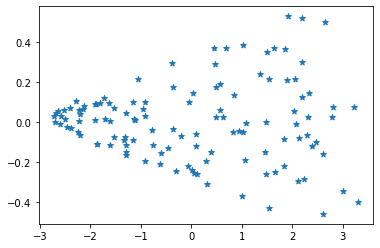

In [19]:
#可视化展示
plt.scatter(new[:,0],new[:,1],marker='*')
plt.show()